# s7. Data visualization `Matplotlib`

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

Visualization is an important part of data analysis. By presenting information in a graphical form, you facilitate the process of its perception, which makes it possible to highlight additional patterns, evaluate ratios of values, and convey key aspects in the data faster.

Let's start with a small "reminder" that you should always keep in mind when creating any charts.

## Bad advices

1. **Title** graphics for wimps. It is always clear from the graph what data and phenomena it describes.

2. Never **sign** any **axes** of the chart. Let the beholder develop his intuition!

3. **Units of measurement** are optional. What difference does it make in what the amount was measured - in people or in liters!

4. The smaller the **font** on the chart, the sharper the beholder's vision.

5. On one graph, you need to try to fit all the information that you have in the dataset. With full titles, transcripts, footnotes. The more text, the more informative!

6. Whenever possible, use 3D and special effects, let them know that you are a born designer. In addition, there will be less visual distortion.

Seriously, be sure to check out the list of recommended materials at the end of the notebook on charting rules and working with libraries for data visualization in Python.

The main libraries for visualization in Python are `matplotlib`, `seaborn`, `plotly`. Let's take a look at the first one today.

## Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')    #chart style
%matplotlib inline 

We work with a dataset on sales and ratings of video games. Dataset taken from [Kaggle](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

- `Name` $-$ video game name
- `Platform` $-$ the platform the game was launched on
- `Year_of_Release` $-$ release year
- `Genre` $-$ genre
- `Publisher` $-$ publisher
- `NA_Sales` $-$ sales volume in North America (in million units)
- `EU_Sales` $-$ sales volume in the European Union (in million units)
- `JP_Sales` $-$ sales volume in Japan (in million units)
- `Other_Sales` $-$ sales volume in the rest of the world (in million units)
- `Global_Sales` $-$ total sales (in million units)
- `Critic_Score` $-$ cumulative score compiled by Metacritic staff
- `Critic_Count` $-$ number of critics rated the game
- `User_Score` $-$ cumulative score compiled by Metacritic subscribers (users)
- `User_Count` $-$ number of users to rate the game
- `Developer` $-$ responsible for creating the game
- `Rating` $-$ rating (Everyone, Teen, Adults Only, etc.)

In [2]:
df = pd.read_csv('video_games_sales.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

There are a lot of NaNs in the data, so let's throw out all the missing observations. We also see that some of the pandas columns have been converted to the wrong type. Let's fix this:

In [5]:
df = df.dropna()

In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [7]:
df.shape

(6825, 16)

## Basic design `matplotlib`

Let's look at the dynamics of sales of **games in the world** (Global_Sales) by **years** (Year_of_Release):

In [8]:
df.groupby('Year_of_Release')['Global_Sales'].sum()

Year_of_Release
1985.0      0.03
1988.0      0.03
1992.0      0.03
1994.0      1.27
1996.0     20.10
1997.0     35.01
1998.0     43.18
1999.0     51.17
2000.0     81.24
2001.0    253.88
2002.0    288.84
2003.0    255.35
2004.0    321.78
2005.0    334.32
2006.0    416.72
2007.0    456.23
2008.0    489.12
2009.0    459.85
2010.0    412.96
2011.0    383.69
2012.0    291.93
2013.0    267.17
2014.0    192.43
2015.0    159.16
2016.0     91.56
Name: Global_Sales, dtype: float64

X-axis:

In [9]:
df.groupby('Year_of_Release')['Global_Sales'].sum().index

Float64Index([1985.0, 1988.0, 1992.0, 1994.0, 1996.0, 1997.0, 1998.0, 1999.0,
              2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
              2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0],
             dtype='float64', name='Year_of_Release')

Y-axis:

In [10]:
df.groupby('Year_of_Release')['Global_Sales'].sum().values

array([3.0000e-02, 3.0000e-02, 3.0000e-02, 1.2700e+00, 2.0100e+01,
       3.5010e+01, 4.3180e+01, 5.1170e+01, 8.1240e+01, 2.5388e+02,
       2.8884e+02, 2.5535e+02, 3.2178e+02, 3.3432e+02, 4.1672e+02,
       4.5623e+02, 4.8912e+02, 4.5985e+02, 4.1296e+02, 3.8369e+02,
       2.9193e+02, 2.6717e+02, 1.9243e+02, 1.5916e+02, 9.1560e+01])

Draw a graph:

``plt.plot(X axis, Y axis)``

In [11]:
gb = df.groupby('Year_of_Release')['Global_Sales'].sum()
gb.index

Float64Index([1985.0, 1988.0, 1992.0, 1994.0, 1996.0, 1997.0, 1998.0, 1999.0,
              2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
              2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0],
             dtype='float64', name='Year_of_Release')

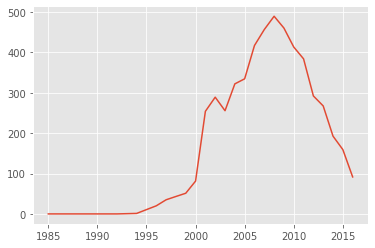

In [12]:
# строим график
gb = df.groupby('Year_of_Release')['Global_Sales'].sum()
plt.plot(gb.index, gb.values)

Let's get back to *Bad advice*. What is missing from the chart?

### Title

```plt.title('Name')```

``` plt.title('Name', fontsize= size, fontweight='Font weight', family = 'Font type')```

+ ```fontweight``` - Font weight

Fontweight options:

```fontweight= {‘ultralight’, ‘light’, ‘normal’, ‘regular’, ‘book’, ‘medium’, ‘roman’, ‘semibold’, ‘demibold’, ‘demi’, ‘bold’, ‘heavy’, ‘extra bold’, ‘black’}``` or a numerical value in the range 0-1000.

+ ```family``` - Font type

Family options: 

```family  = {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}```

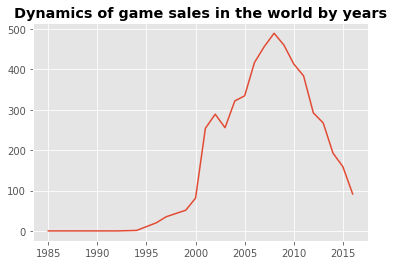

In [13]:
gb = df.groupby('Year_of_Release')['Global_Sales'].sum()
plt.title("Dynamics of game sales in the world by years", fontweight='bold') #title
plt.plot(gb.index, gb.values)

### Title of chart axes

```plt.xlabel('Name of X')```

```plt.ylabel('Name of Y')```

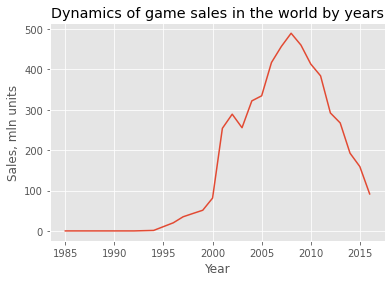

In [14]:
gb = df.groupby('Year_of_Release')['Global_Sales'].sum()

plt.title("Dynamics of game sales in the world by years") #title

plt.xlabel("Year") #x-axis

plt.ylabel("Sales, mln units") #y-axis

plt.plot(gb.index, gb.values)

### Graph size and clarity

``` plt.figure(figsize=(width, height), dpi = clarity)```

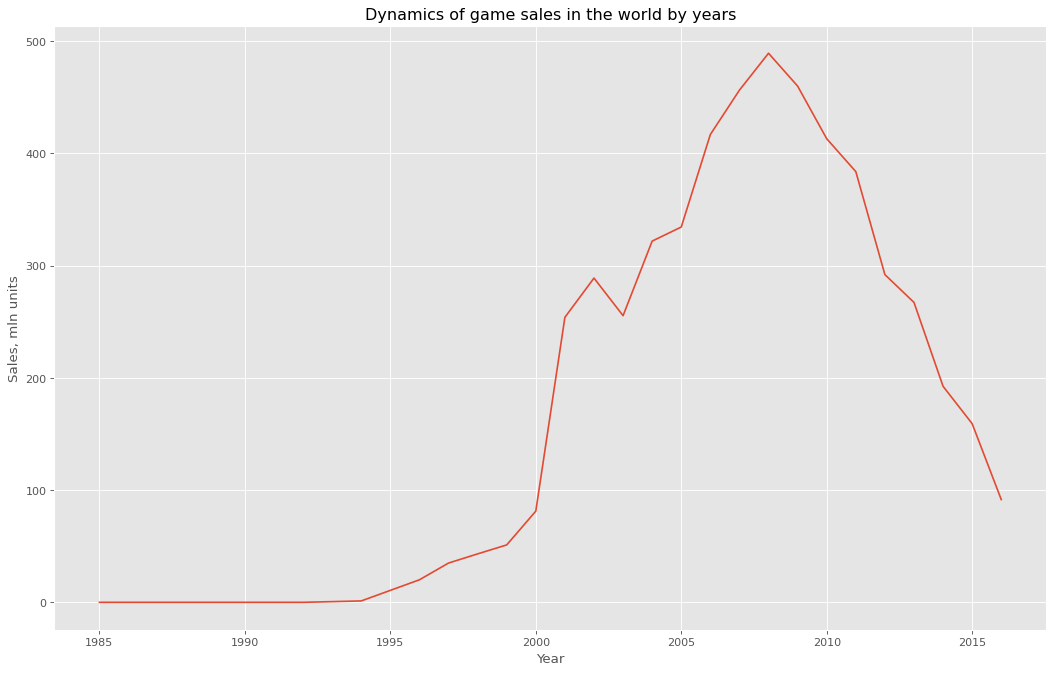

In [15]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi=80) #size and clarity

#plt.figure(figsize=(16, 10)) #size

#plt.figure(dpi=80) #clarity

plt.title("Dynamics of game sales in the world by years") #title

plt.xlabel("Year") #x-axis

plt.ylabel("Sales, mln units") #y-axis

plt.plot(gb.index, gb.values)

### Line

#### Line thickness

```plt.plot(X-axis, Y-axis, lw = thickness)```

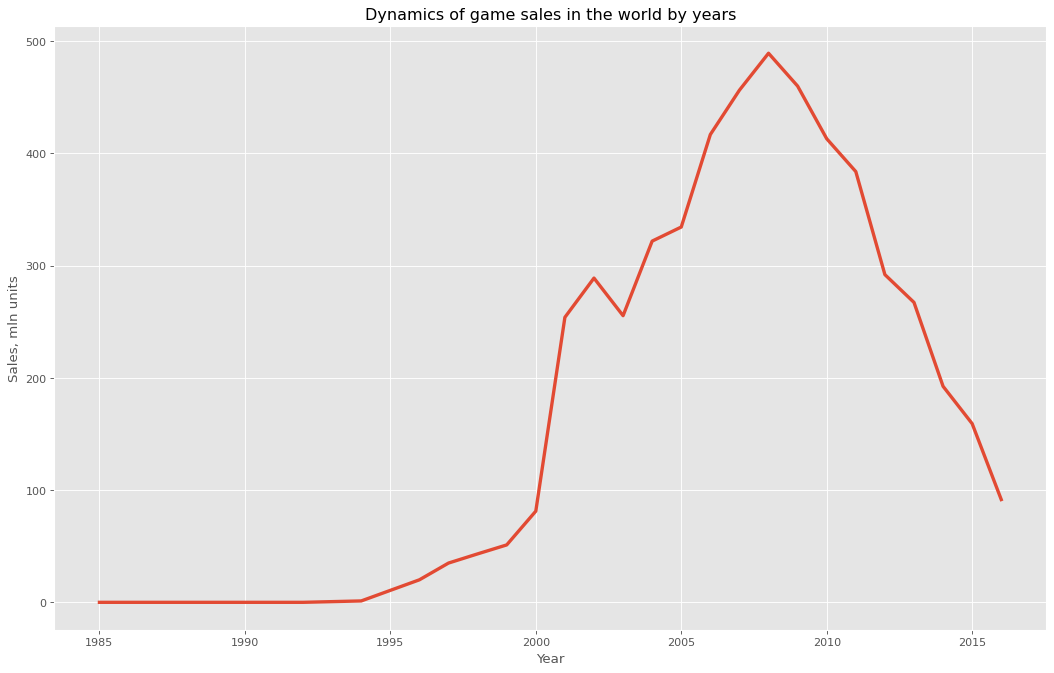

In [16]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi=80) #size and clarity

plt.title("Dynamics of game sales in the world by years") #title

plt.xlabel("Year") #x-axis

plt.ylabel("Sales, mln units") #y-axis


plt.plot(gb.index, gb.values, lw = 3) #changed thickness

#### Line Format

```plt.plot(X-axis, Y-axis, ls = 'Line format')```

What could be:

``` python

`-`

'--' 

'-.'

':'

''

(offset, on-off-seq)

```

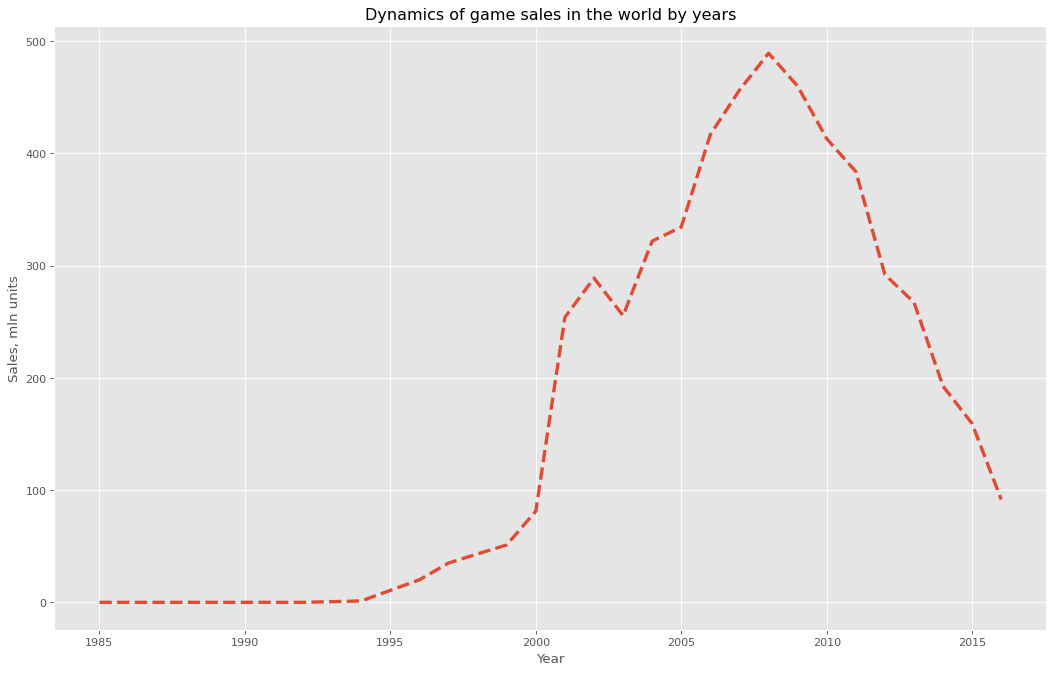

In [17]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi=80) #size and clarity

plt.title("Dynamics of game sales in the world by years") #title

plt.xlabel("Year") #x-axis

plt.ylabel("Sales, mln units") #y-axis


plt.plot(gb.index, gb.values, lw = 3, ls = '--') #changed thickness and format

#### Color

```plt.plot(X-axis, Y-axis, color = "color")```

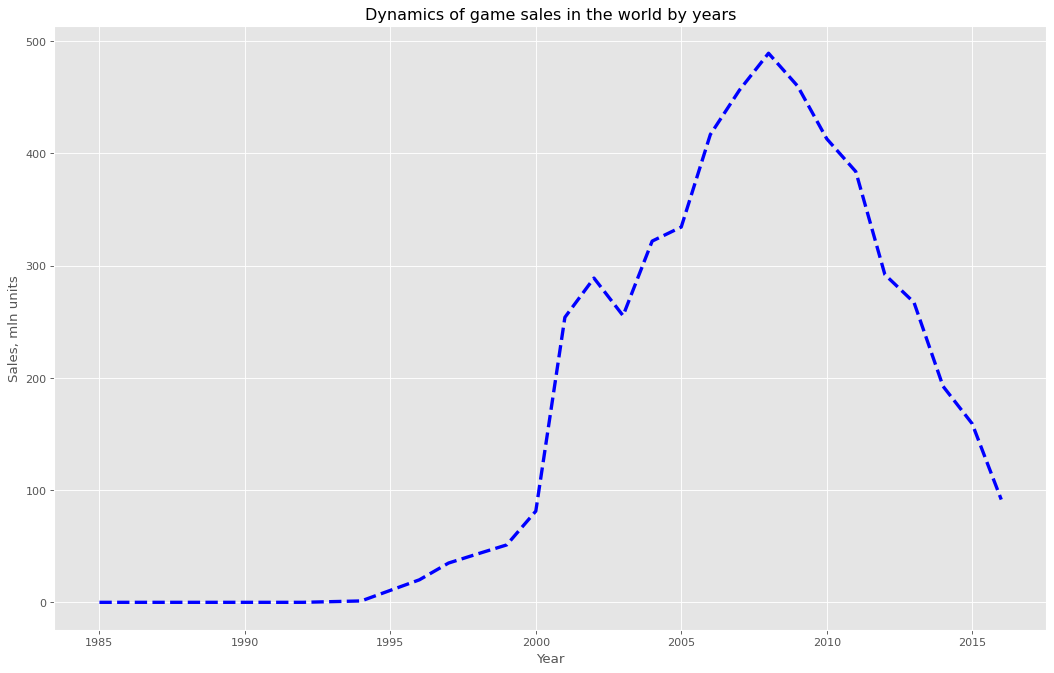

In [18]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi=80) #size and clarity

plt.title("Dynamics of game sales in the world by years") #title

plt.xlabel("Year") #x-axis

plt.ylabel("Sales, mln units") #y-axis


plt.plot(gb.index, gb.values, lw = 3, ls = '--', color = 'b') #changed thickness, format and color

## Multiple objects on one chart

One chart that will display all sales indicators at once (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

In [19]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [20]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [21]:
df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985.0,0.00,0.03,0.00,0.01,0.03
1988.0,0.00,0.02,0.00,0.01,0.03
1992.0,0.02,0.00,0.00,0.00,0.03
1994.0,0.39,0.26,0.53,0.08,1.27
1996.0,7.91,6.88,4.06,1.24,20.10
1997.0,15.34,8.67,9.01,2.02,35.01
1998.0,18.13,12.13,10.81,2.14,43.18
1999.0,23.32,15.69,9.67,2.45,51.17
2000.0,39.34,25.20,11.27,5.49,81.24


First option:

<AxesSubplot:xlabel='Year_of_Release'>

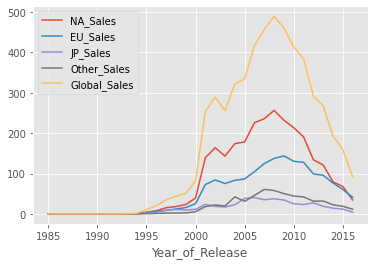

In [22]:
gb = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

gb.plot()

Second option:

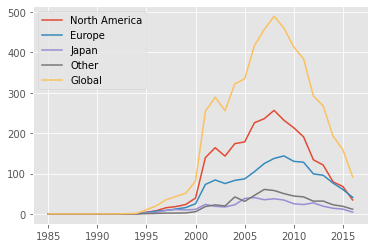

In [23]:
gb = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()


plt.plot(gb.index, gb['NA_Sales'], label = 'North America')

plt.plot(gb.index, gb['EU_Sales'], label = 'Europe')

plt.plot(gb.index, gb['JP_Sales'], label = 'Japan')

plt.plot(gb.index, gb['Other_Sales'], label = 'Other')

plt.plot(gb.index, gb['Global_Sales'], label = 'Global')


plt.legend()

## ``subplots``

### One chart

In an ideal universe, we create plots with the `subplots` function, which generates our plot into 2 variables (usually called fig and ax):

* `fig` is responsible for the chart as a whole. Think of it as a file that stores a graph like a picture.
* `ax` $-$ is the coordinate axis on which we actually build the graph. All elements of the chart are stored just in it.

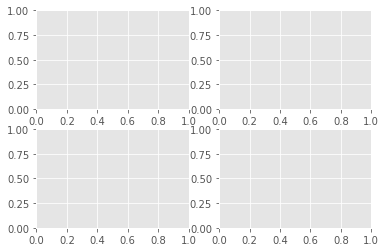

In [24]:
fig, ax = plt.subplots(2,2) # created a chart canvas with 1 row and 1 column (1 chart)
                            # figsize is the size of our rectangle in non-obvious units

Let's look at the dynamics of game sales in the world over the years, but now we use `subplots`:

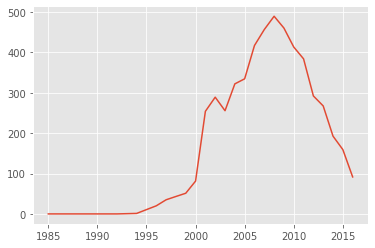

In [25]:
gb = df.groupby('Year_of_Release')['Global_Sales'].sum()

# build a graph
fig, ax = plt.subplots(1,1)

ax.plot(gb.index, gb.values)

### Basic design with ``subplots``

The _ax_ variable actually contains a bunch of methods that allow you to make the chart more pleasant. Let's look at a few of them:

#### Graph size

```fig, ax = plt.subplots(1,1, figsize=(width, height))```

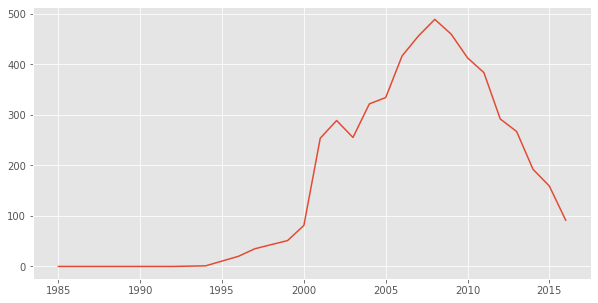

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(gb.index, gb.values)

#### Title of chart axes

```ax.set_xlabel('Name X', fontsize=Font size, family='Font')```

```ax.set_ylabel('Name Y', fontsize=Font size, family='Font')```


Family option: 

```family  = {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}```

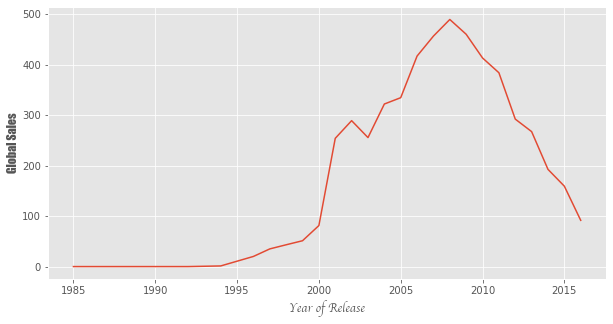

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values)

#### Line

```ax.plot(X-axis, Y-axis, color = "color", ls = 'Line format', lw = thickness)```

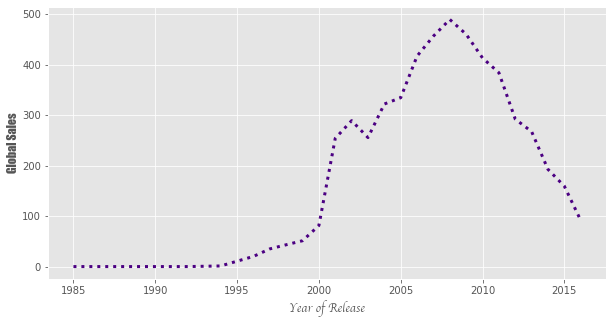

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

#### Graph borders

##### Invisible borders

``` ax.spines['Border name'].set_visible(False)```

Borders name: 

+ "right" - right border
+ "left" - left border
+ "top" - top border
+ "bottom" - bottom border

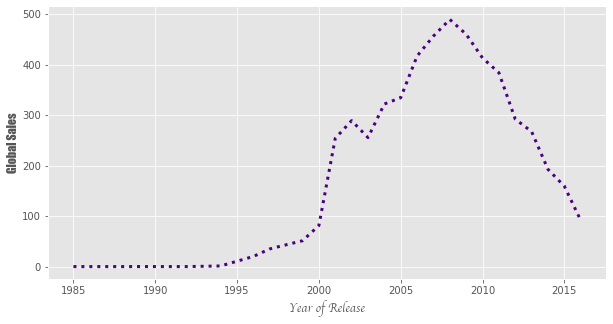

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

#Invisible borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

##### Borders thickness

``` ax.spines['Border name'].set_linewidth(thickness)```

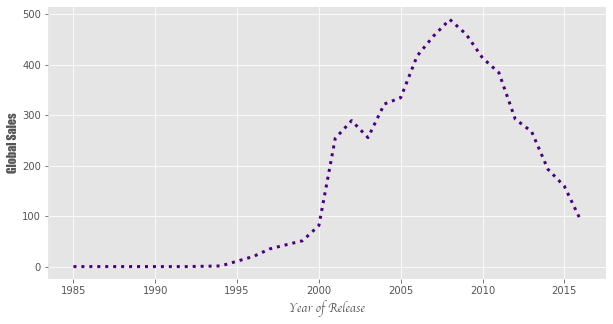

In [30]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Borders thickness
ax.spines['bottom'].set_linewidth(0.2) 
ax.spines['left'].set_linewidth(0.2)

##### Ticks thickness

``` ax.xaxis.set_tick_params(width=Ширина засечек)```

``` ax.yaxis.set_tick_params(width=Ширина засечек)```

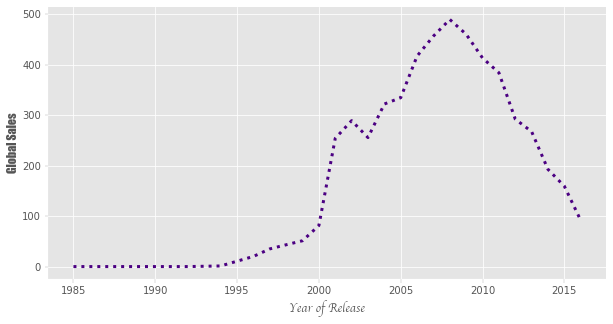

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_linewidth(0.2) 
ax.spines['left'].set_linewidth(0.2)

# Ticks thickness
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

### Multiple charts

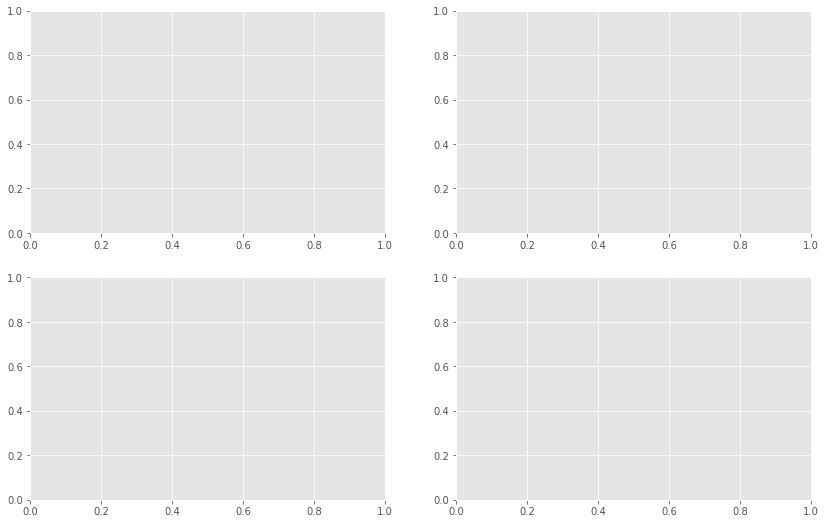

In [32]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) #increase the number of objects to two rows and two columns

We now have four graphs!

The _ax_ object in this case **becomes a matrix**. And to refer to each graph, you need to refer to it by index from _ax_.

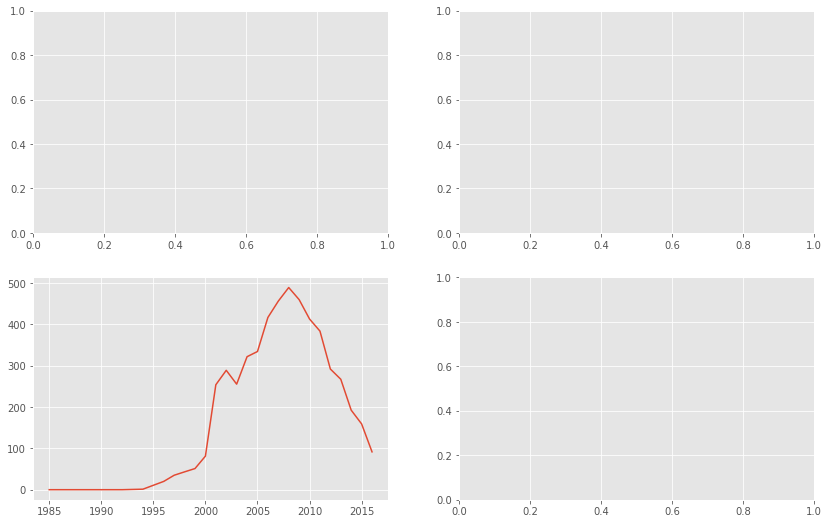

In [33]:
fig, ax = plt.subplots(2,2, figsize=(14,9))

ax[1][0].plot(gb.index, gb.values)


Create a charting system that has:
* 1st graph shows sales in North America (`NA_Sales`);
* on the 2nd sale in the European Union (`EU_Sales`);
* on the 3rd sales in Japan (`JP_Sales`)
* on the 4th chart, all 3 lines are together;
* Each chart must be a different color. In the fourth chart - each chart should be the same color as in its cell + the 4th chart should have a legend

1. Make the grouping we need

In [34]:
gb = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales']].sum()
gb

,NA_Sales,EU_Sales,JP_Sales
Year_of_Release,,,
1985.0,0.00,0.03,0.00
1988.0,0.00,0.02,0.00
1992.0,0.02,0.00,0.00
1994.0,0.39,0.26,0.53
1996.0,7.91,6.88,4.06
1997.0,15.34,8.67,9.01
1998.0,18.13,12.13,10.81
1999.0,23.32,15.69,9.67
2000.0,39.34,25.20,11.27


2. Draw!

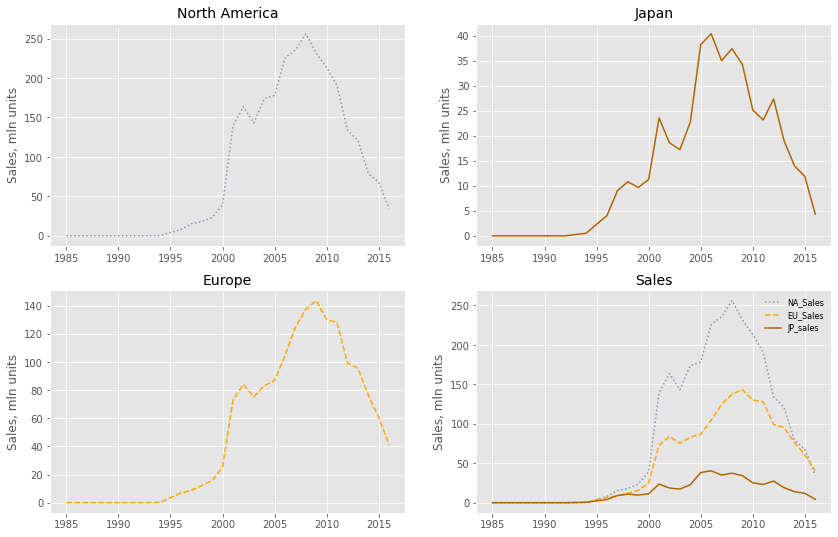

In [35]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

#Using the for, you can apply some kind of modification to all the charts of the system.
for x in range(2):
    for y in range(2):
        ax[x][y].set_ylabel('Sales, mln units')

# 1st graph
ax[0][0].plot(gb.index, gb.NA_Sales, color='#8c92ac', ls = ':')
ax[0][0].set_title('North America', fontsize=14)

# 2d graph
ax[1][0].plot(gb.index, gb.EU_Sales, color='#ffa500', ls = '--')
ax[1][0].set_title('Europe', fontsize = 14)

# 3d graph
ax[0][1].plot(gb.index, gb.JP_Sales, color='#b06500', ls = '-'); 
ax[0][1].set_title('Japan', fontsize = 14)

# 4th graph
ax[1][1].plot(gb.index, gb.NA_Sales, label = 'NA_Sales', color='#8c92ac', ls = ':')
ax[1][1].plot(gb.index, gb.EU_Sales, label = 'EU_Sales', color='#ffa500', ls = '--')
ax[1][1].plot(gb.index, gb.JP_Sales, label = 'JP_sales', color='#b06500', ls = '-')
ax[1][1].set_title('Sales', fontsize = 14)
ax[1][1].legend(loc=1, fontsize=8, frameon=False);

## Graphs for categorical variables

1. Let's look at the number of games for each year using a bar chart

In [36]:
gb = df.groupby('Year_of_Release')['Name'].nunique()
gb

Year_of_Release
1985.0      1
1988.0      1
1992.0      1
1994.0      1
1996.0      6
1997.0     13
1998.0     25
1999.0     30
2000.0     97
2001.0    228
2002.0    351
2003.0    357
2004.0    337
2005.0    388
2006.0    369
2007.0    391
2008.0    399
2009.0    344
2010.0    264
2011.0    273
2012.0    179
2013.0    146
2014.0    143
2015.0    132
2016.0    121
Name: Name, dtype: int64

<BarContainer object of 25 artists>

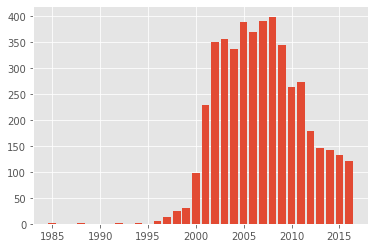

In [37]:
plt.bar(gb.index, gb.values)

<AxesSubplot:xlabel='Year_of_Release'>

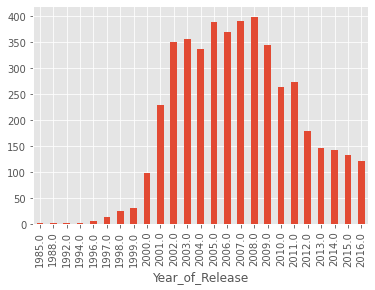

In [38]:
gb.plot(kind = 'bar')

<AxesSubplot:ylabel='Year_of_Release'>

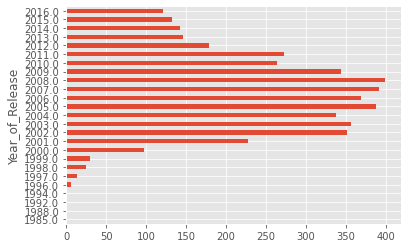

In [39]:
gb.plot(kind = 'barh')

2. Let's look separately at the number of Sports and Action games over the past 5 years. Let's make a double chart and flip it horizontally

In [40]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [41]:
gb_sports = df[df.Genre=='Sports'].groupby('Year_of_Release')['Name'].nunique()
gb_sports.tail()

Year_of_Release
2012.0    14
2013.0    11
2014.0    16
2015.0    14
2016.0    11
Name: Name, dtype: int64

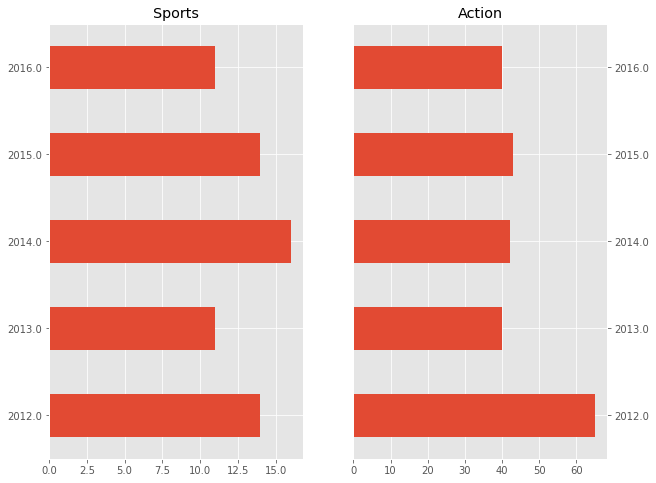

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

#Sports
gb_sports = df[df.Genre=='Sports'].groupby('Year_of_Release')['Name'].nunique().tail(5)
gb_sports.plot(kind='barh', ax=ax[0])
ax[0].set_title('Sports')

#Action
gb_act = df[df.Genre=='Action'].groupby('Year_of_Release')['Name'].nunique().tail(5)
gb_act.plot(kind='barh', ax=ax[1])
ax[1].set_title('Action')
ax[1].yaxis.set_ticks_position('right') #put axis labels on the right


#Remove the label to the scale, which is generated automatically
for i in range(2):
    ax[i].set_ylabel('', visible=False)

Using two vertical bar charts, we will derive the average rating of critics and users of games of various ratings.

In [43]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [44]:
df['User_Score'] = df['User_Score'].astype(float) #convert object to float
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [45]:
df['User_Score']

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16667    2.4
16677    8.8
16696    7.6
16700    5.8
16706    7.2
Name: User_Score, Length: 6825, dtype: float64

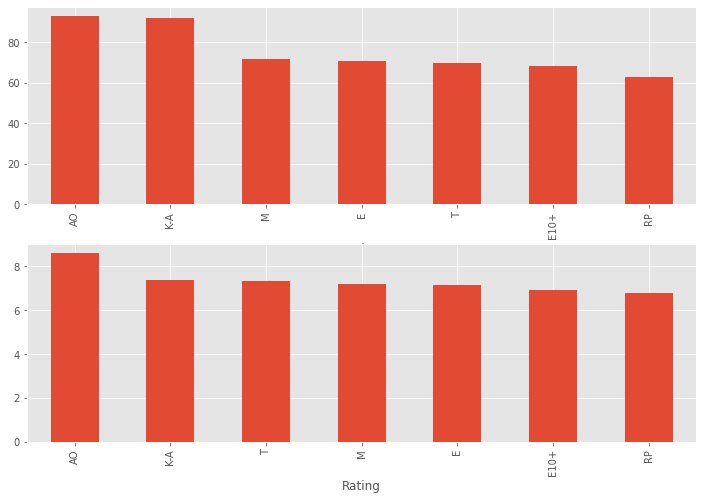

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

gb = df.groupby('Rating')[['Critic_Score', 'User_Score']].mean()

gb['Critic_Score'].sort_values(ascending=False).plot(kind='bar', ax=ax[0])
gb['User_Score'].sort_values(ascending=False).plot(kind='bar', ax=ax[1]);

## Scatter plot

Now we will work with a dataset that contains information about the number of crimes in the US states in 2005

In [47]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


Let's look at a graph of **murder** versus **burglary**

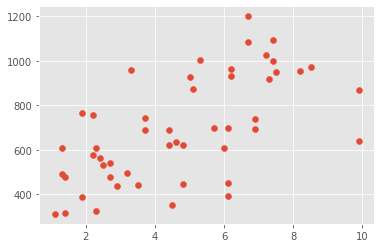

In [48]:
fig, ax = plt.subplots() 
ax.scatter(crimes['murder'], crimes['burglary'])

Let's try to add additional information to the graph, for example, let's denote the population as the point size

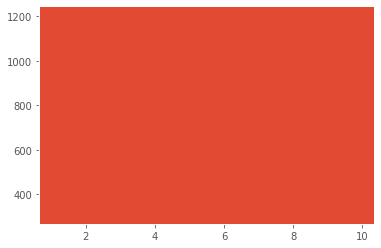

In [49]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population'])

The population size is so large that the point covers the entire coordinate area. Let's try to scale our variable - we care about the relative sizes of the states relative to each other, and not the absolute values. The scaling values are also chosen experimentally: the one that looks better and is more informative.

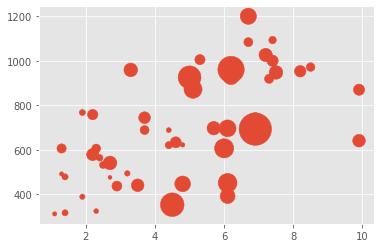

In [50]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Great, but the next problem is dot merging. Let's add a transparency option so you can see where they overlap.

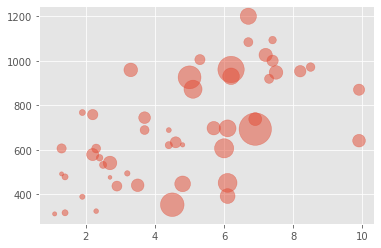

In [51]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000,
           alpha = 0.5);

Now let's add some other variable (for example, robbery) and put it in the color parameter

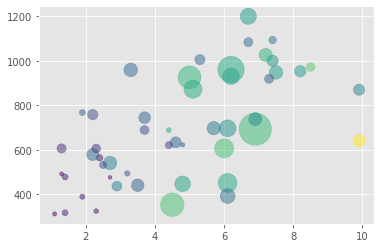

In [52]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'],crimes['burglary'],s=crimes['population'] / 35000,
    alpha=0.5, c=crimes['Robbery'])

It remains to find out what color means. To do this, you need to save the chart into a variable and pass it as an argument to the `colorbar()` function. We can also change the color scale using the `cmap` argument.

/var/folders/4l/wvvj0csx3cd5ksl4vg3g_knm0000gn/T/ipykernel_14419/4219647251.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(color_graph);


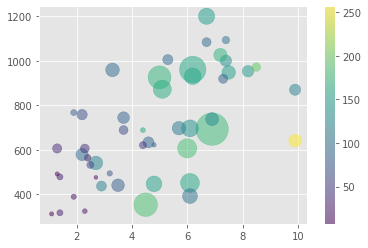

In [53]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
#cmap='hot',
                         c=crimes['Robbery'])
plt.colorbar(color_graph);

Последнее что тут сделаем - это подпишем штаты

/var/folders/4l/wvvj0csx3cd5ksl4vg3g_knm0000gn/T/ipykernel_14419/2894677578.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(color_graph)


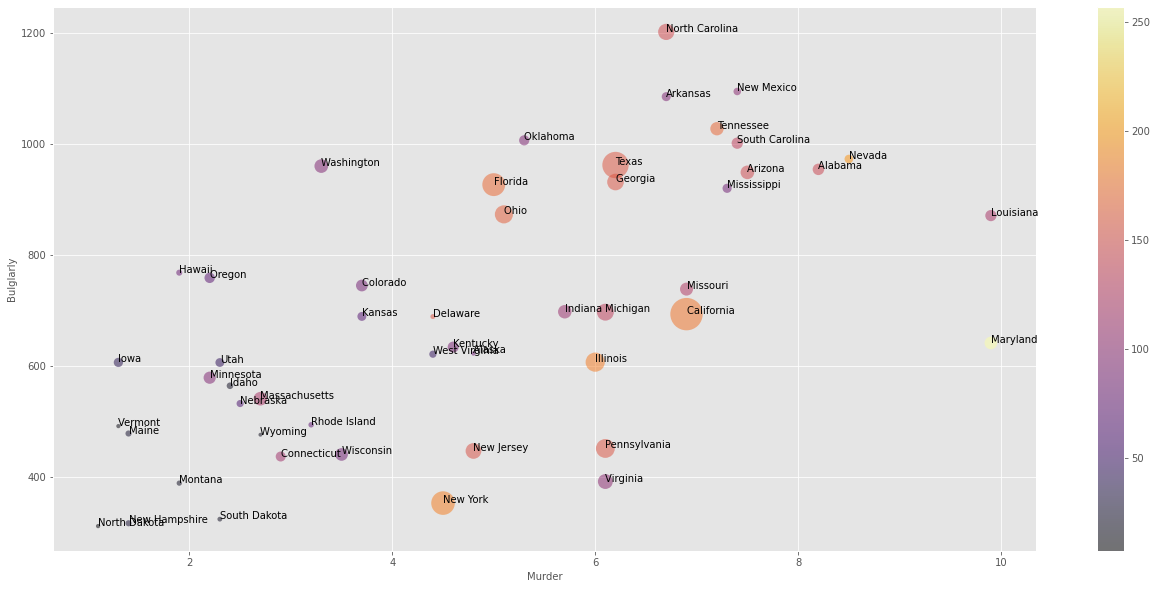

In [54]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s=crimes['population'] / 35000, c=crimes['Robbery'], 
                         cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(crimes['state']):  #using enumerate we create an object of tuples of the form index - state name from columns with state names
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10)  # we use the annotate method, to which we say that we need to take the name of the state from the tuple,
                                                                                   # which was created using enumerate, and the coordinates of the signature are set using
                                                                                   # the x and y variable values for the desired index from the enumerate object (refers to the desired row in the dataframe)

plt.colorbar(color_graph)

## Practice

Use the built-in tips dataset from the seaborn library

In [55]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Task 1

Sum the total orders by day of the week and build a line chart:

Add to chart:

  + Title (choose saturation, size, font)
  + Axis labels (choose saturation, size, font)
  + Change line design (thickness, format, color)

``plot``:

``subplots``:

### Task 2

Build a bar chart that shows who gave the most tips overall: women or men

Add to chart:

  + Title (choose saturation, size, font)
  + Axis labels (choose saturation, size, font)
  + Woman column - red; men - blue

### Task 3

Show on the graph for which day of the week in **on average** leave more tips? Use barplot

Add to chart:

+ Title (choose saturation, size, font)
+ Axis label (choose saturation, size, font)

### Task 4

Do the same as in the previous punt using boxplot.

Add to chart:

+ Title (choose saturation, size, font)

### Task 5

Draw a scatter plot showing the tip size (tip) versus the check size (total_bill)

Add to chart:

+ Title (choose saturation, size, font)
+ Axis label (choose saturation, size, font)

Make it so that the size of the dot is responsible for the number of guests (size)

Make it so that the check is paid by a man, the circle is blue, and if a woman, then red (do not forget about the legend)